In [58]:
from spectral import envi
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import statistics

#B10817055

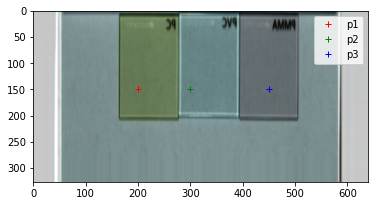

In [59]:
file_name = r"test_RT.hdr"
data = envi.open(file_name)

np_data = data.asarray()

fig, ax = plt.subplots()
default_bands = [192,134,76]
false_color_data = np_data[...,default_bands]

#normalize data
d_max = np.max(false_color_data)
d_min = np.min(false_color_data)
normaled_data = (false_color_data - d_min)/(d_max - d_min)

point = [200, 300, 450]
name = ["PC","PVC","PMMA"]


ax.imshow(normaled_data)
ax.plot(point[0],150,'r+',label="p1")
ax.plot(point[1],150,'g+',label="p2")
ax.plot(point[2],150,'b+',label="p3")
ax.legend()


In [60]:
pic = [] #the result picture
for i in range(0, 3):#calculating the angle
    sample = np_data[150, point[i]]
    up = (sample * np_data).sum(-1)
    a = np.linalg.norm(sample)
    b = np.linalg.norm(np_data, axis=-1)
    angle_result = up/(a*b)
    pic.append(angle_result)

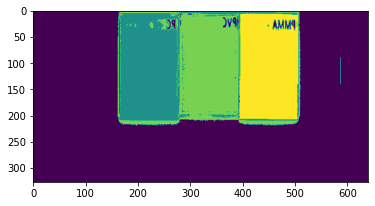

In [61]:
for i in range(0, 3):
    color = [0.99,0.9965, 0.994,  0.999]
    cluster1 = []
    cluster2 = []
    cluster3 = []
    cluster4 = []

    for j in range(0, 640):
        for k in range(0, 327):
            dis1 = abs(pic[i][k, j]-color[0])
            dis2 = abs(pic[i][k, j]-color[1])
            dis3 = abs(pic[i][k, j]-color[2])
            dis4 = abs(pic[i][k, j]-color[3])
            min_value = min([dis1, dis2, dis3, dis4])
            min_index = [dis1, dis2, dis3, dis4].index(min_value)
            if min_index == 0:
                cluster1.append(pic[i][k, j])
            elif min_index == 1:
                cluster2.append(pic[i][k, j])
            elif min_index == 2:
                cluster3.append(pic[i][k, j])
            elif min_index == 3:
                cluster4.append(pic[i][k, j])
    color[0] = statistics.mean(cluster1)
    color[1] = statistics.mean(cluster2)
    color[2] = statistics.mean(cluster3)
    color[3] = statistics.mean(cluster4)

#coloring 
for i in range(0, 3):
    for j in range(0, 640):
        for k in range(0, 327):
            d1 = abs(pic[i][k, j]-color[0])
            d2 = abs(pic[i][k, j]-color[1])
            d3 = abs(pic[i][k, j]-color[2])
            d4 = abs(pic[i][k, j]-color[3])
            min_value = min([d1, d2, d3, d4])
            min_index = [d1, d2, d3, d4].index(min_value)
            if min_index == 0:
                pic[i][k, j] = 0
            elif min_index == 1:
                pic[i][k, j] = 0.5
            elif min_index == 2:
                pic[i][k, j] = 0.8
            elif min_index == 3:
                pic[i][k, j] = 1
    plt.imshow(pic[i])
    plt.savefig(str(name[i])+'.png')